### Hello! Welcome to my portfolio, I’m Sals.

As a final project that will complete my journey through a virtual internship at Kalbe Nutritionals, I will develop predictive data models to improve the company's business such as optimizing business competitive strategies or creating regression and clustering analysis, then preparing visual media to present solutions to clients.

I invite you to explore my portfolio and review my work. As I believe in continuous learning and growth, I am open to any thoughts or recommendations you may have.

Feel free to connect and reach me on [Linked In](https://www.linkedin.com/in/salsabila-mardhiyah/)!

### Setup

In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

### Importing Data

In [2]:
# Import transaction dataset
t_url = 'https://raw.githubusercontent.com/salsmardhiyah/kalbe-qty-prediction-cust-segmentation/main/data/transaction.csv'
df_t = pd.read_csv(t_url, delimiter=';')
df_t.sample(2)

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
1052,TR77842,409,14/03/2022,P2,3200,7,22400,5
2560,TR19616,302,02/07/2022,P8,16000,3,48000,2


In [3]:
# Import customer dataset
c_url = 'https://raw.githubusercontent.com/salsmardhiyah/kalbe-qty-prediction-cust-segmentation/main/data/customer.csv'
df_c = pd.read_csv(c_url, delimiter=';')
df_c.sample(2)

,CustomerID,Age,Gender,Marital Status,Income
399,400,23,1,Single,"2,79"
59,60,56,0,Married,"10,61"


In [4]:
# Import product dataset
p_url = 'https://raw.githubusercontent.com/salsmardhiyah/kalbe-qty-prediction-cust-segmentation/main/data/product.csv'
df_p = pd.read_csv(p_url, delimiter=';')
df_p.sample(2)

,ProductID,Product Name,Price
3,P4,Potato Chip,12000
8,P9,Yoghurt,10000


In [5]:
# Import store dataset
s_url = 'https://raw.githubusercontent.com/salsmardhiyah/kalbe-qty-prediction-cust-segmentation/main/data/store.csv'
df_s = pd.read_csv(s_url, delimiter=';')
df_s.sample(2)

,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
5,6,Lingga,Lingga,Modern Trade,"-5,135399","119,42379"
4,5,Bonafid,Gita,General Trade,"-7,250445","112,768845"


### Data Preprocessing

In [23]:
dfl = {'df_c': df_c,
      'df_p': df_p,
      'df_s': df_s,
      'df_t': df_t}

#### Checking Data Types

In [24]:
for df_name, df in dfl.items():
  print(f"{df_name} Information:\n")
  print(f"{df.info()}")
  print('-' * 70)

df_c Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      447 non-null    int64 
 1   Age             447 non-null    int64 
 2   Gender          447 non-null    int64 
 3   Marital Status  444 non-null    object
 4   Income          447 non-null    object
dtypes: int64(3), object(2)
memory usage: 17.6+ KB
None
----------------------------------------------------------------------
df_p Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductID     10 non-null     object
 1   Product Name  10 non-null     object
 2   Price         10 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 368.0+ bytes
None
----------------------------------------------------

From information above, several columns have incorrect data types:
* `Income` column on df_c should be integer instead of object
* `Date` column on df_t should be date time instead of object
* `Latitude`,`Longitude` columns on df_s should be integer instead of object



##### Changing `Income` Column Data Type

In [25]:
# Replacing values in Income column and change data type
df_c['Income'] = df_c['Income'].str.replace(',','.').astype(float)

In [26]:
# Re-checking Income values
df_c.sample()

,CustomerID,Age,Gender,Marital Status,Income
159,160,48,1,Married,12.57


In [27]:
# Re-checking Income data type
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      447 non-null    int64  
 1   Age             447 non-null    int64  
 2   Gender          447 non-null    int64  
 3   Marital Status  444 non-null    object 
 4   Income          447 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 17.6+ KB


##### Changing `Date` Column Data Type

In [28]:
# Replacing values in Date column and change data type
df_t['Date'] = pd.to_datetime(df_t['Date'])

In [29]:
# Re-checking Income values
df_t.sample()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
3578,TR37097,153,2022-09-17,P3,7500,2,15000,2


In [30]:
# Re-checking Date data type
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   TransactionID  5020 non-null   object        
 1   CustomerID     5020 non-null   int64         
 2   Date           5020 non-null   datetime64[ns]
 3   ProductID      5020 non-null   object        
 4   Price          5020 non-null   int64         
 5   Qty            5020 non-null   int64         
 6   TotalAmount    5020 non-null   int64         
 7   StoreID        5020 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 313.9+ KB


##### Changing `Latitude`,`Longitude` Column Data Type

In [31]:
# Replacing values in Latitude and Longitude column and change data type
df_s['Latitude'] = df_s['Latitude'].str.replace(',','.').astype(float)
df_s['Longitude'] = df_s['Longitude'].str.replace(',','.').astype(float)

In [32]:
# Re-checking Latitude and Longitude values
df_s.sample()

,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
5,6,Lingga,Lingga,Modern Trade,-5.135399,119.42379


In [33]:
# Re-checking Latitude and Longitude data type
df_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   StoreID     14 non-null     int64  
 1   StoreName   14 non-null     object 
 2   GroupStore  14 non-null     object 
 3   Type        14 non-null     object 
 4   Latitude    14 non-null     float64
 5   Longitude   14 non-null     float64
dtypes: float64(2), int64(1), object(3)
memory usage: 800.0+ bytes


#### Handling Null Values

In [34]:
# Checking NULL values
for df_name, df in dfl.items():
  print(f"Null values in {df_name}:")
  print(f"\n{df.isnull().sum()}\n")
  print('-' * 30)

Null values in df_c:

CustomerID        0
Age               0
Gender            0
Marital Status    3
Income            0
dtype: int64

------------------------------
Null values in df_p:

ProductID       0
Product Name    0
Price           0
dtype: int64

------------------------------
Null values in df_s:

StoreID       0
StoreName     0
GroupStore    0
Type          0
Latitude      0
Longitude     0
dtype: int64

------------------------------
Null values in df_t:

TransactionID    0
CustomerID       0
Date             0
ProductID        0
Price            0
Qty              0
TotalAmount      0
StoreID          0
dtype: int64

------------------------------


As be seen on information above, df_c `Marital Status` column has 3 null values. We will drop the row because it does not have a significant amount.

In [35]:
# Dropping NULL values
df_c.dropna(inplace=True)

In [36]:
# Re-checking NULL values
df_c.isnull().sum()

CustomerID        0
Age               0
Gender            0
Marital Status    0
Income            0
dtype: int64

#### Handling Duplicate Values

In [37]:
# Checking duplicated values
for df_name, df in dfl.items():
  print(f"Duplicated values in {df_name}:")
  print(f"\n{df.duplicated().sum()}\n")
  print('-' * 30)

Duplicated values in df_c:

0

------------------------------
Duplicated values in df_p:

0

------------------------------
Duplicated values in df_s:

0

------------------------------
Duplicated values in df_t:

0

------------------------------


There is no duplicated values on each dataframe

### Data Merging

In [38]:
# Merging dataframes into one
df_m = df_t.merge(df_c, on='CustomerID')
df_m = df_m.merge(df_p.drop(labels='Price', axis=1), on='ProductID')
df_m = df_m.merge(df_s, on='StoreID')

# Display merged data
df_m.sample()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,Product Name,StoreName,GroupStore,Type,Latitude,Longitude
4173,TR44793,436,2022-12-21,P2,3200,3,9600,6,51,1,Married,18.89,Ginger Candy,Lingga,Lingga,Modern Trade,-5.135399,119.42379


In [39]:
# Display merged data info
df_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4976 entries, 0 to 4975
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   TransactionID   4976 non-null   object        
 1   CustomerID      4976 non-null   int64         
 2   Date            4976 non-null   datetime64[ns]
 3   ProductID       4976 non-null   object        
 4   Price           4976 non-null   int64         
 5   Qty             4976 non-null   int64         
 6   TotalAmount     4976 non-null   int64         
 7   StoreID         4976 non-null   int64         
 8   Age             4976 non-null   int64         
 9   Gender          4976 non-null   int64         
 10  Marital Status  4976 non-null   object        
 11  Income          4976 non-null   float64       
 12  Product Name    4976 non-null   object        
 13  StoreName       4976 non-null   object        
 14  GroupStore      4976 non-null   object        
 15  Type

### Machine Learning Regression (Time Series)

#### Creating New Data Frame

In [40]:
# Creating new dataframe for time series regression
df_ts = df_m.groupby(['Date'], sort=True).agg({'Qty':'sum'})

In [41]:
# Display new dataframe on head
df_ts.head(3)

,Qty
Date,
2022-01-01,49
2022-01-02,50
2022-01-03,76


In [42]:
# Display new dataframe on tail
df_ts.tail(3)

,Qty
Date,
2022-12-29,42
2022-12-30,40
2022-12-31,37


We already have daily total quantity  sorted from January 1st to December 31st 2022 for time series forecasting.

#### Visualizing Quantity Time Series Data

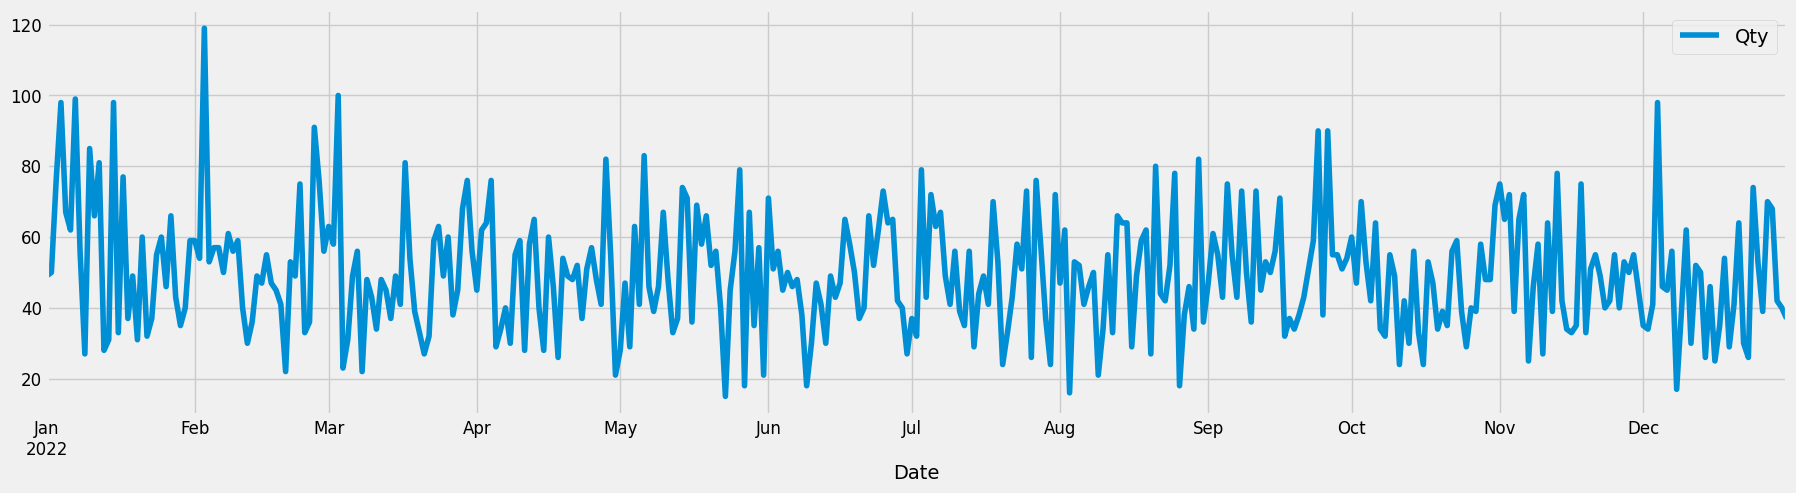

In [43]:
df_ts.plot(figsize=(20, 5))
plt.show()

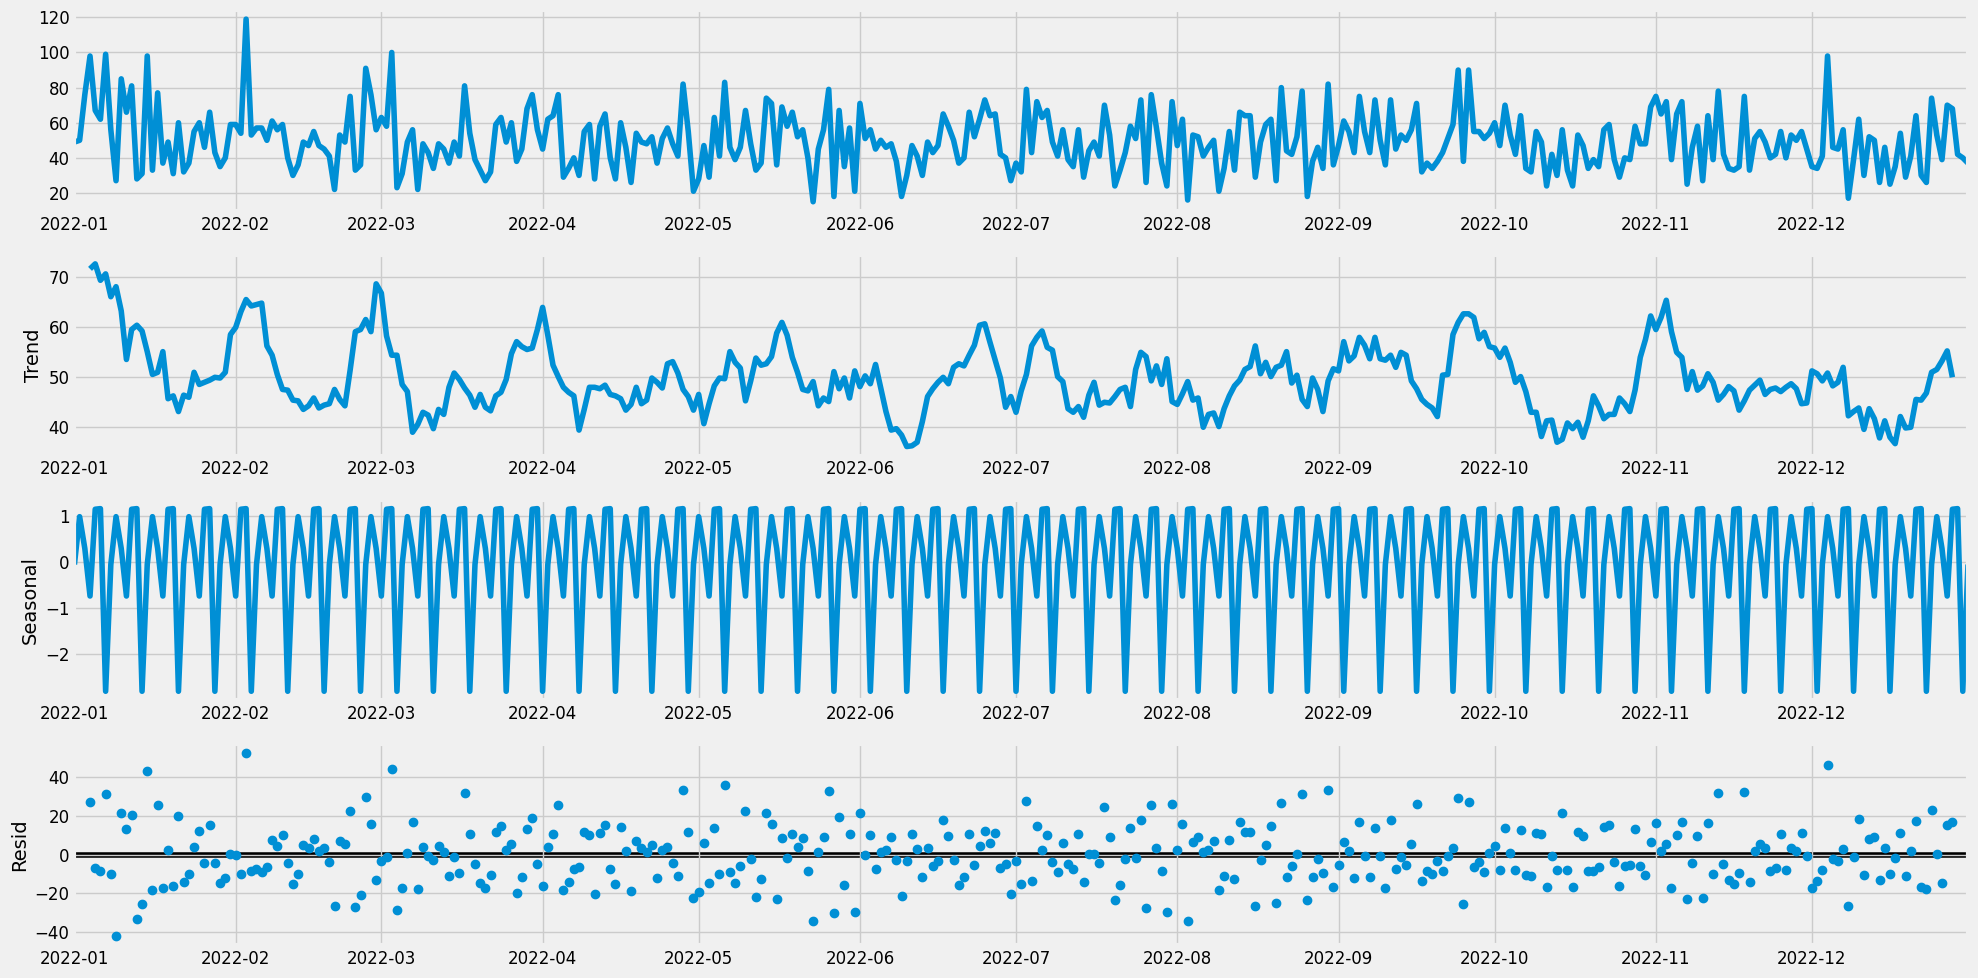

In [44]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
decomposition = sm.tsa.seasonal_decompose(df_ts, model='additive')
fig = decomposition.plot()
plt.show()

From plots above, the seasonal trend repeats every seventh lag.

#### Split Data Train & Test

In [45]:
# Defining data test size
test_ratio = 0.2

# Setting data limit
limit = round(df_ts.shape[0] * test_ratio)

# Divide data train and test
df_train = df_ts[:-limit]
df_test = df_ts[-limit:]

# Re-checking shape of data train and test
print(df_train.shape, df_test.shape)

(292, 1) (73, 1)


In [46]:
df_train.tail()

,Qty
Date,
2022-10-15,33
2022-10-16,24
2022-10-17,53
2022-10-18,47
2022-10-19,34


#### Visualizing Data Train and Test

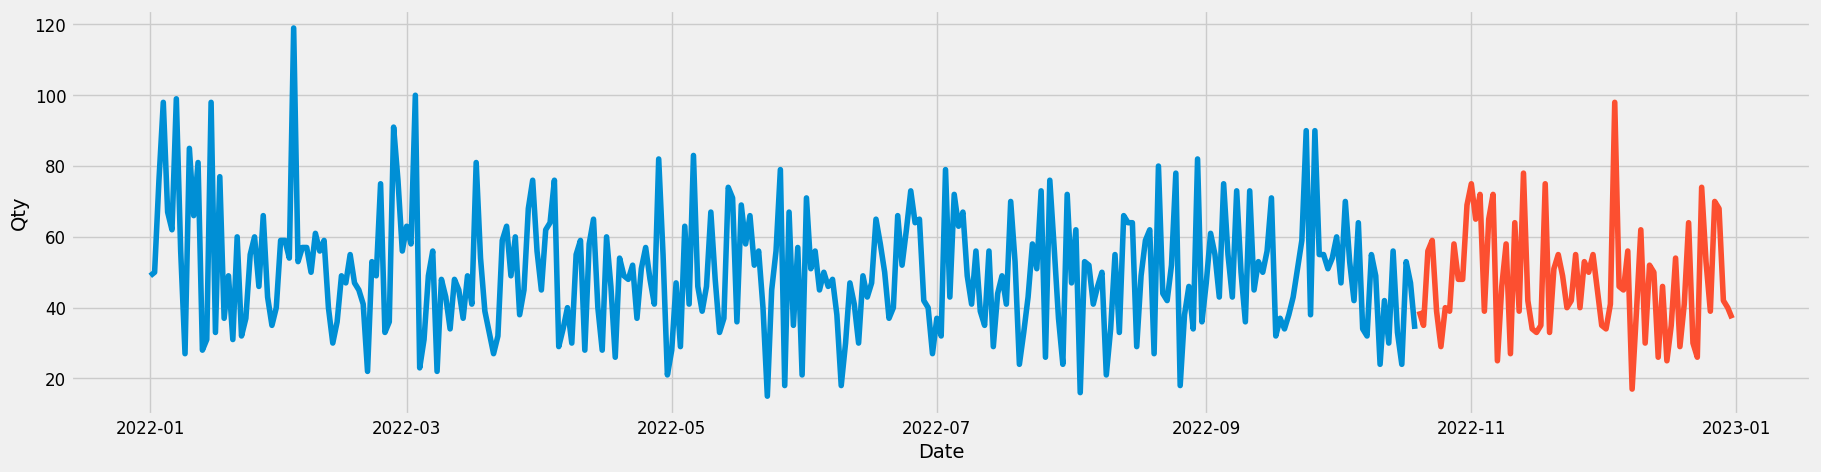

In [47]:
plt.figure(figsize=(20, 5))
sns.lineplot(data=df_train, x='Date', y='Qty')
sns.lineplot(data=df_test, x='Date', y='Qty')

plt.show()

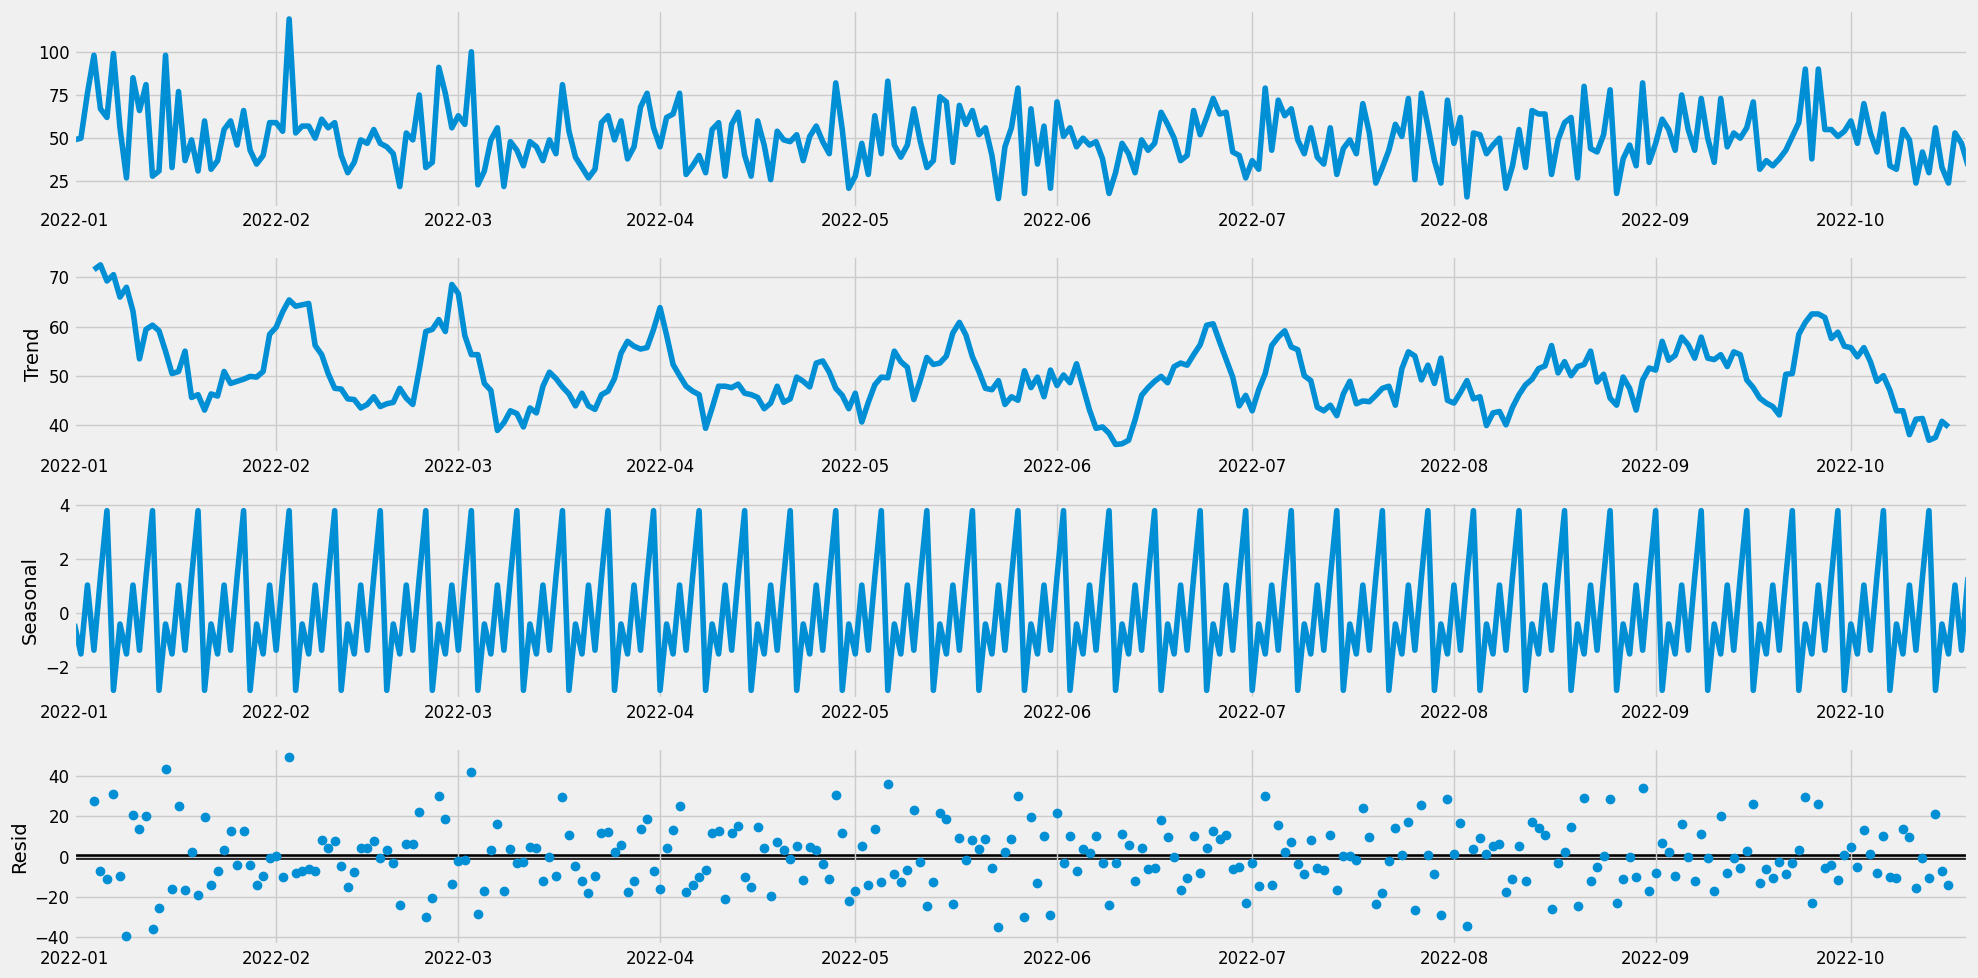

In [48]:
# Decomposition plot data train
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
decomposition = sm.tsa.seasonal_decompose(df_train, model='a')
fig = decomposition.plot()
plt.show()

From plots above, the seasonal trend repeats every seventh lag.

#### Stationarity Check

In [49]:
# Checking for stationarity using adfuller test
# H0 = data is not stationary
# H1 = data is stationary

from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df_train.values)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -17.007970
p-value: 0.000000


The p-value obtained from the test is less than the significance level (0.05), so the null hypothesis is rejected and we can conclude that the data is stationary.

But according to seasonal plot observation, the seasonal data is not stationary.

In [50]:
df_traindiff = df_train['Qty'].diff(periods=7)
df_traindiff.head(10)

Date
2022-01-01     NaN
2022-01-02     NaN
2022-01-03     NaN
2022-01-04     NaN
2022-01-05     NaN
2022-01-06     NaN
2022-01-07     NaN
2022-01-08     7.0
2022-01-09   -23.0
2022-01-10     9.0
Name: Qty, dtype: float64

In [51]:
# Checking for stationarity using adfuller test
# H0 = data is not stationary
# H1 = data is stationary

from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df_traindiff.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -8.389324
p-value: 0.000000


The p-value obtained from the test is less than the significance level (0.05), so the null hypothesis is rejected and we can conclude that the data is stationary.

#### Parameter Selection for ARIMA

##### By ACF & PACF Plot

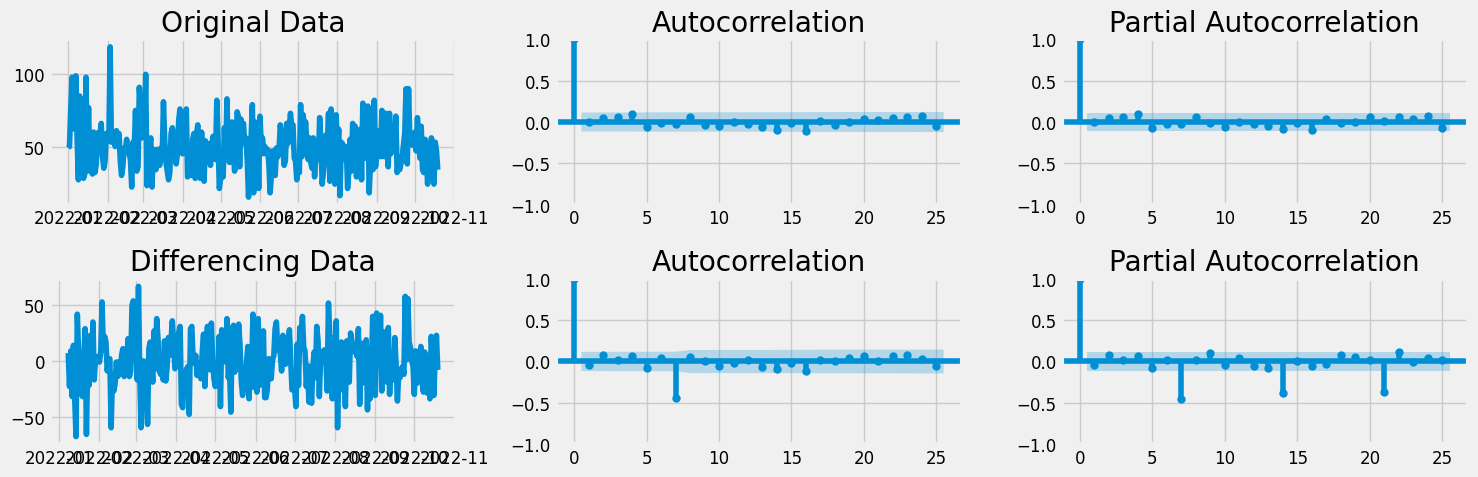

In [52]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

fig, ax = plt.subplots(2, 3, figsize=(15,5))

# Plotting original data
ax[0,0].plot(df_train['Qty'])
ax[0,0].set_title('Original Data')

# Plotting ACF and PACF
plot_acf(df_train.dropna(), ax=ax[0,1])
plot_pacf(df_train.dropna(), ax=ax[0,2])

# Plotting differencing data
ax[1,0].plot(df_traindiff)
ax[1,0].set_title('Differencing Data')

# Plotting ACF and PACF
plot_acf(df_traindiff.dropna(), ax=ax[1,1])
plot_pacf(df_traindiff.dropna(), ax=ax[1,2])


plt.tight_layout()


The seasonal arima model formed from the plots above is (0,0,0) with seasonal (0,1,1,7). However, we will also check the MA=1 and/or AR=1 combined models, so the models that might be formed are seasonal models (0,1,1,7), (1,1,0,7), or (1 ,1,1,7).

In [53]:
# Fit ARIMA(0,0,0)(0,1,1,7) seasonal model
order = (0,0,0)
seasonal_order = (0,1,1,7)
mod1 = sm.tsa.SARIMAX(df_train['Qty'], order=order, seasonal_order=seasonal_order)
fit_mod1 = mod1.fit()
print(fit_mod1.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.21487D+00    |proj g|=  5.14554D-02

At iterate    5    f=  4.19471D+00    |proj g|=  3.69996D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      6      7      1     0     0   6.992D-06   4.195D+00
  F =   4.1947068228159390     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
                                 SARIMAX Results                                 
Dep. Variable:                       Qty   No. Obs

/usr/local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


- Significance parameter (ma.S.L7) P value less than 0.05, therefore significant.

Residual assumptions on time series model:
- Residual white noise test (Ljung-Box) prob value more than 0.05, therefore residual is white noise.
- Residual normal distribution test  (Jarque-Bera (JB)) prob value less than 0.05,  hence not normally distributed.

Residual assumptions not meet.

In [54]:
# Fit ARIMA(0,0,0)(1,1,1,7) seasonal model
order = (0,0,0)
seasonal_order = (1,1,1,7)
mod2 = sm.tsa.SARIMAX(df_train['Qty'], order=order, seasonal_order=seasonal_order)
fit_mod2 = mod2.fit()
print(fit_mod2.summary())

/usr/local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.20878D+00    |proj g|=  1.42951D-01

At iterate    5    f=  4.19510D+00    |proj g|=  2.12482D-02

At iterate   10    f=  4.19371D+00    |proj g|=  4.97787D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     16      1     0     0   2.285D-06   4.194D+00
  F =   4.1936770731996376     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
                                 SARIMAX Results                      

- Significance parameter (ma.S.L7) P value less than 0.05, therefore significant.

Residual assumptions on time series model:
- Residual white noise test (Ljung-Box) prob value more than 0.05, therefore residual is white noise.
- Residual normal distribution test  (Jarque-Bera (JB)) prob value less than 0.05,  hence not normally distributed.

Residual assumptions not meet.

In [55]:
# Fit ARIMA(0,0,0)(1,1,0,7) seasonal model
order = (0,0,0)
seasonal_order = (1,1,0,7)
mod3 = sm.tsa.SARIMAX(df_train['Qty'], order=order, seasonal_order=seasonal_order)
fit_mod3 = mod3.fit()
print(fit_mod3.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.37208D+00    |proj g|=  9.36314D-03

At iterate    5    f=  4.37195D+00    |proj g|=  4.56076D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      8     10      1     0     0   8.670D-06   4.372D+00
  F =   4.3718826124411780     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
                                SARIMAX Results                                
Dep. Variable:                     Qty   No. Observa

/usr/local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


- Significance parameter P value less than 0.05, therefore significant.

Residual assumptions on time series model:
- Residual white noise test (Ljung-Box) prob value more than 0.05, therefore residual is white noise.
- Residual normal distribution test  (Jarque-Bera (JB)) prob value more than 0.05,  hence normally distributed.
-  Heteroskedasticity prob value more than 0.05, hence all residuals has a constant variance (homoscedastic).

Residual assumptions meet.

##### By Auto-Arima

In [56]:
!pip install pmdarima


[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python3.10 -m pip install --upgrade pip


In [57]:
# Determine p and q values using auto-arima with D=1
from pmdarima.arima import auto_arima

mod_aa1 = auto_arima(df_train, start_p=0, start_q=0,
                      test='adf',
                      max_p=0, max_q=0,
                      m=7,
                      seasonal=True,
                      stationary=False,
                      start_P=0,
                      max_P=1,
                      D=1,
                      max_D=1,
                      start_Q=0,
                      max_Q=1,
                      trace=True,
                      seasonal_test='ocsb',
                      scoring='mse',
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=False)

 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=2623.538, Time=0.02 sec
 ARIMA(0,0,0)(0,1,1)[7] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,0,0)(1,1,0)[7] intercept   : AIC=2558.653, Time=0.22 sec
 ARIMA(0,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=0.27 sec

Best model:  ARIMA(0,0,0)(1,1,0)[7] intercept
Total fit time: 0.695 seconds


Auto-Arima automatically discover the optimal order for an ARIMA model. The best model from auto-arima is the same order as model mod3 before.

#### Seasonal ARIMA Model

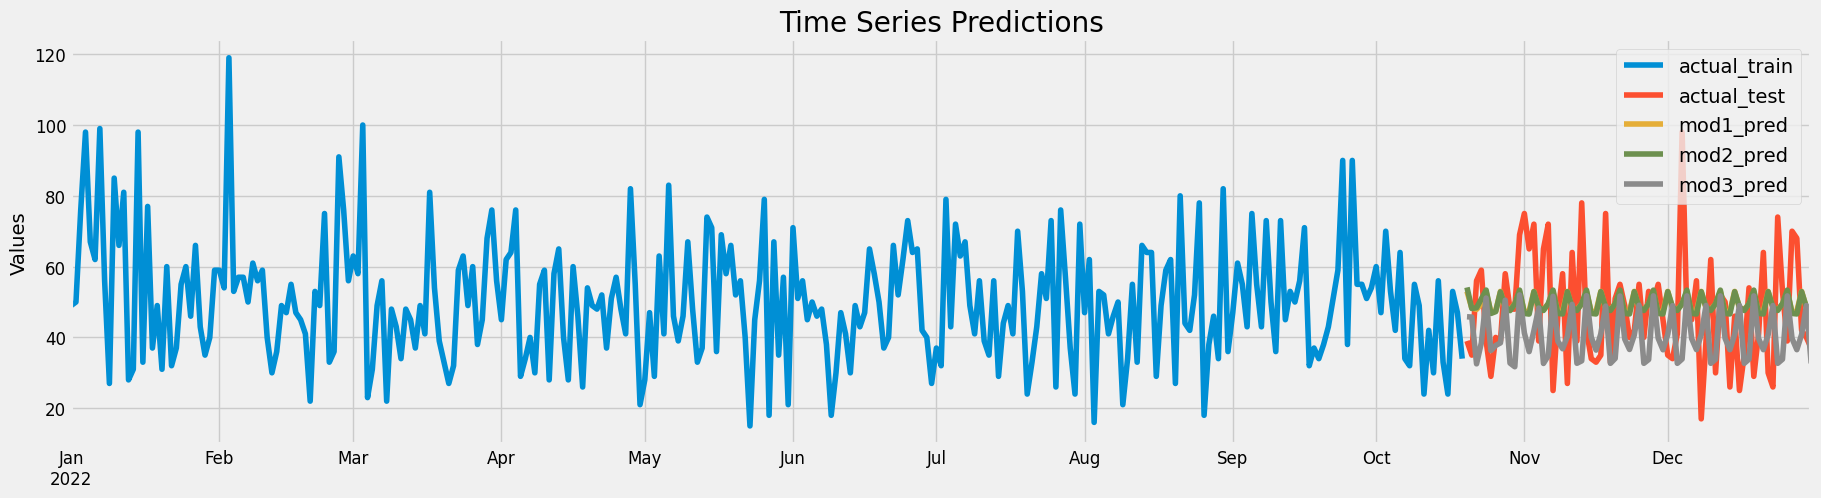

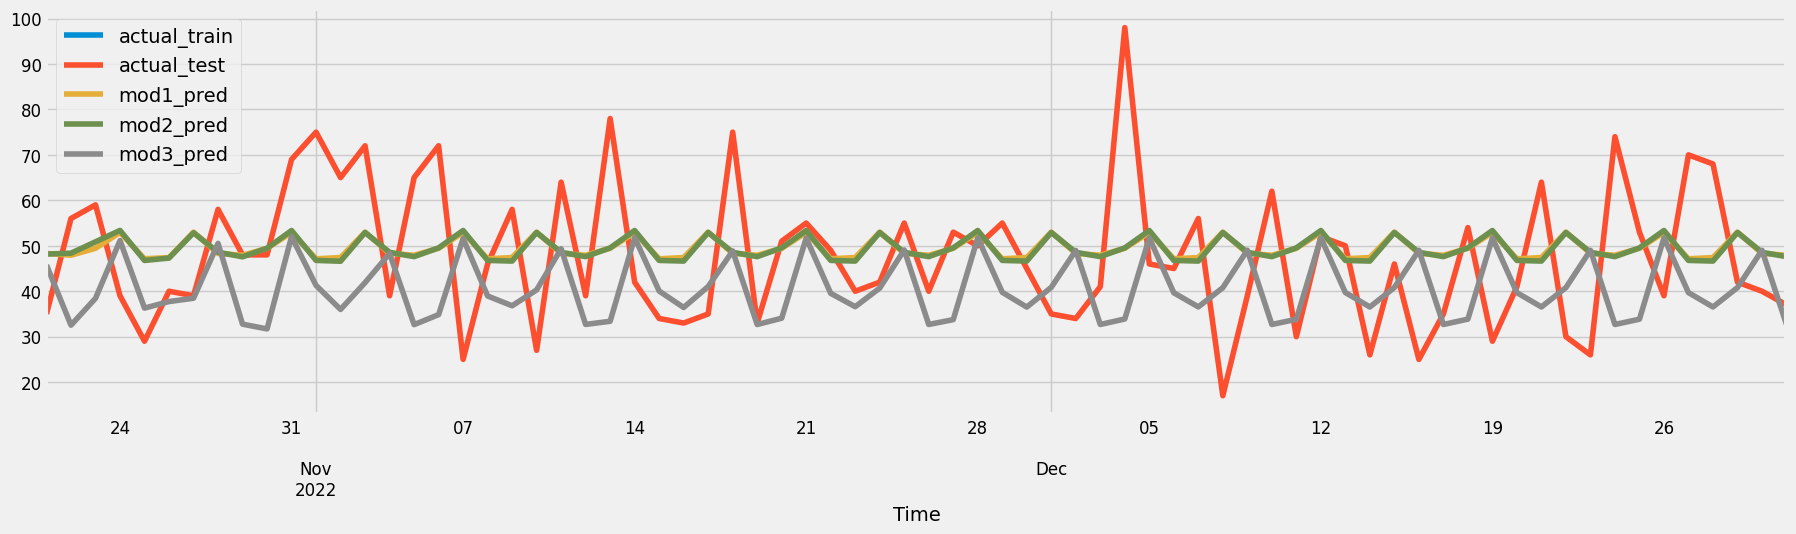

In [58]:
# Predictions
mod1_pred = fit_mod1.predict(start=len(df_train), end=len(df_ts)-1)
mod2_pred = fit_mod2.predict(start=len(df_train), end=len(df_ts)-1)
mod3_pred = fit_mod3.predict(start=len(df_train), end=len(df_ts)-1)

# Create a DataFrame for plotting
df_pred = pd.DataFrame({
    'actual_train': df_train['Qty'],
    'actual_test': df_test['Qty'],
    'mod1_pred': mod1_pred,
    'mod2_pred': mod2_pred,
    'mod3_pred': mod3_pred,
})

# Plotting predictions
df_pred.plot(figsize=(20, 5))
plt.title('Time Series Predictions')
plt.ylabel('Values')

df_pred[len(df_train)+1 :].plot(figsize=(20, 5))
plt.xlabel('Time')

plt.show()

From the plot above, we can see roughly that the green line is closer to the actual line.

#### Model Evaluation

In [59]:
# Defining metric evaluations function
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

def calculate_metrics(true_values, predicted_values):
    mae = mean_absolute_error(true_values, predicted_values)
    mse = mean_squared_error(true_values, predicted_values)
    mape = mean_absolute_percentage_error(true_values, predicted_values)
    return mae, mse, mape

In [60]:
# Calculating evaluation metrics
true_values = df_test['Qty']
models = {
  'mod1_pred': mod1_pred,
  'mod2_pred': mod2_pred,
  'mod3_pred': mod3_pred
}

for name, mod in models.items():
  metrics = calculate_metrics(true_values, mod)
  print(f"Evaluation {name}: MAE({metrics[0]}), MSE({metrics[1]}), MAPE({metrics[2]})")


Evaluation mod1_pred: MAE(13.394039613349948), MSE(262.55231623830963), MAPE(0.33016027799611797)
Evaluation mod2_pred: MAE(13.408869349085819), MSE(264.02773140575925), MAPE(0.3300942810061988)
Evaluation mod3_pred: MAE(14.898357172272712), MSE(370.5846560594951), MAPE(0.3131759889907345)


The mod1_pred and mod2_pred both have lowest MAE and MSE, but the residual assumptions are not meet.

The mod3_pred ARIMA model with p,d,q = (0,0,0)(1,1,0,7) is the best performance compared to the other models.

#### Forcasting with Best Model

In [61]:
# Fit ARIMA(0,0,0)(1,1,0,7) seasonal model
order = (0,0,0)
seasonal_order = (1,1,0,7)
best = sm.tsa.SARIMAX(df_test['Qty'], order=order, seasonal_order=seasonal_order)
fit_best = best.fit()
print(fit_best.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.94907D+00    |proj g|=  1.20962D-02

At iterate    5    f=  3.94883D+00    |proj g|=  4.18850D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      9     11      1     0     0   1.100D-06   3.949D+00
  F =   3.9487543862218484     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
                                SARIMAX Results                                
Dep. Variable:                     Qty   No. Observa

/usr/local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


- Significance parameter P value less than 0.05, therefore significant.

Residual assumptions on time series model:
- Residual white noise test (Ljung-Box) prob value more than 0.05, therefore residual is white noise.
- Residual normal distribution test  (Jarque-Bera (JB)) prob value more than 0.05,  hence normally distributed.
-  Heteroskedasticity prob value more than 0.05, hence all residuals has a constant variance (homoscedastic).

Residual assumptions meet.

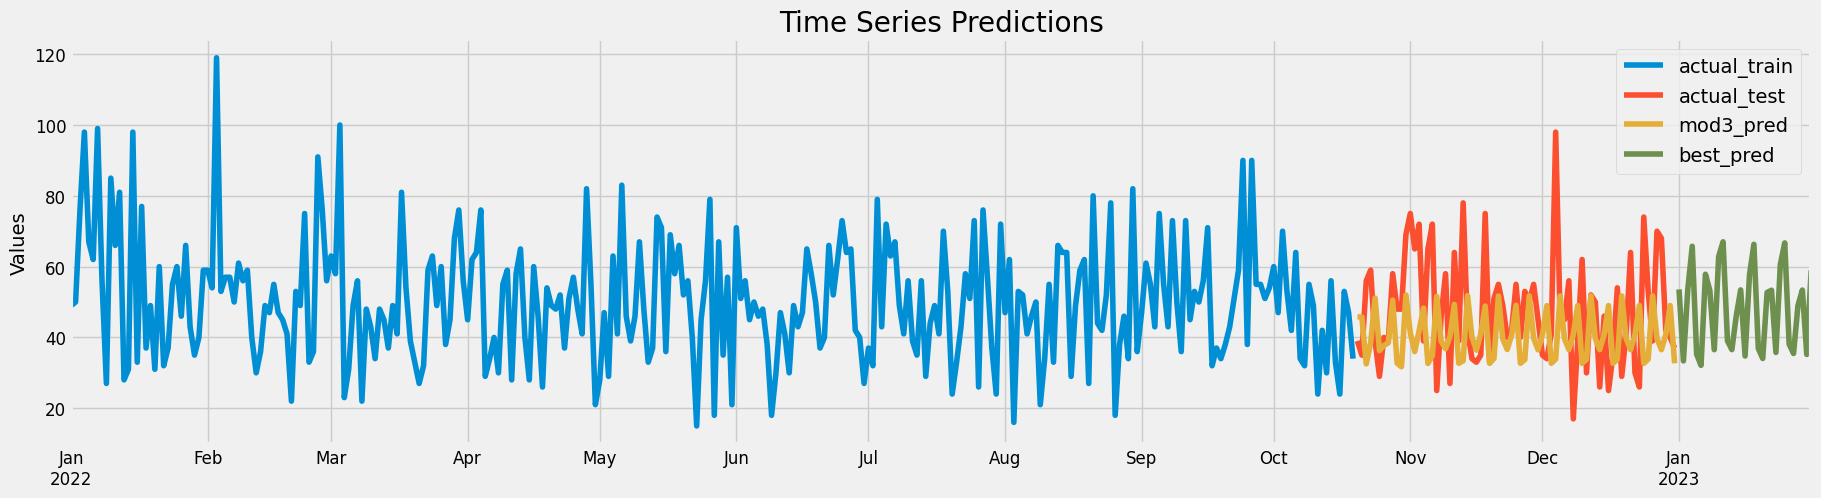

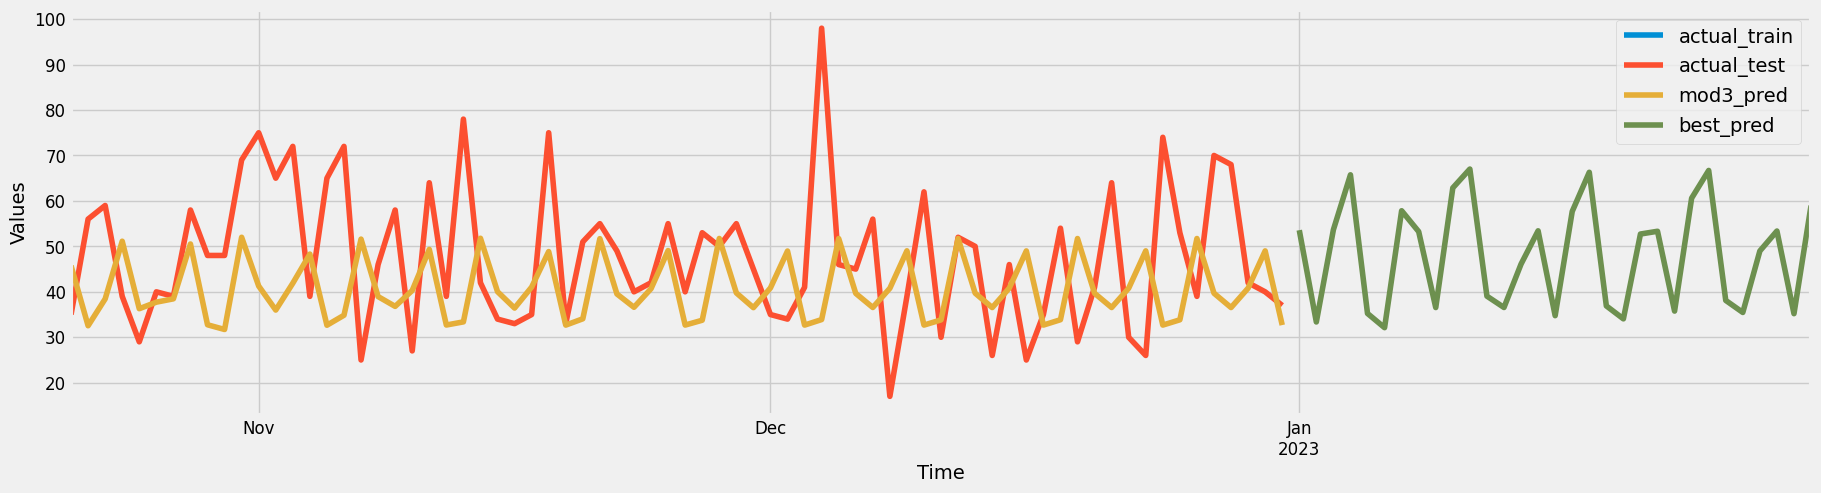

In [62]:
best_pred = fit_best.forecast(steps=31)

# Create a DataFrame for plotting
df_pred = pd.DataFrame({
    'actual_train': df_train['Qty'],
    'actual_test': df_test['Qty'],
    'mod3_pred': mod3_pred,
    'best_pred': best_pred
})

# Plotting predictions
df_pred.plot(figsize=(20, 5))
plt.title('Time Series Predictions')
plt.ylabel('Values')

df_pred[len(df_train)+1 :].plot(figsize=(20, 5))
plt.xlabel('Time')
plt.ylabel('Values')

plt.show()

In [63]:
best_pred

2023-01-01    53.563317
2023-01-02    33.366830
2023-01-03    53.663807
2023-01-04    65.746732
2023-01-05    35.240196
2023-01-06    32.113562
2023-01-07    57.842729
2023-01-08    53.245991
2023-01-09    36.540090
2023-01-10    62.866262
2023-01-11    67.016036
2023-01-12    39.048109
2023-01-13    36.556127
2023-01-14    46.101665
2023-01-15    53.424746
2023-01-16    34.752539
2023-01-17    57.682363
2023-01-18    66.301016
2023-01-19    36.903047
2023-01-20    34.053554
2023-01-21    52.715606
2023-01-22    53.324050
2023-01-23    35.759497
2023-01-24    60.602541
2023-01-25    66.703799
2023-01-26    38.111396
2023-01-27    35.463296
2023-01-28    48.989861
2023-01-29    53.380774
2023-01-30    35.192260
2023-01-31    58.957555
Freq: D, Name: predicted_mean, dtype: float64

In [64]:
# Display information of predicted quantity values in January 2023
df_jan23 = pd.DataFrame(data=best_pred)
df_jan23.describe()

,predicted_mean
count,31.000000
mean,48.233205
std,11.955421
min,32.113562
25%,36.149794
50%,52.715606
75%,57.762546
max,67.016036


In [65]:
# Sum of predicted quantity needed in January 2023
df_jan23.agg({'predicted_mean':'sum'})

predicted_mean    1495.229354
dtype: float64

### Machine Learning Clustering

#### Creating New Data Frame

In [66]:
# Creating new dataframe for clustering
df_cl = df_m.groupby(['CustomerID']).agg({'TransactionID':'count',
                                          'Qty':'sum',
                                          'TotalAmount':'sum'}).reset_index()

In [67]:
# Displaying cluster data frame
df_cl.sample()

,CustomerID,TransactionID,Qty,TotalAmount
173,175,10,30,304800


In [68]:
# Dropping CustomerID Column
df_cl = df_cl.drop(columns=['CustomerID'])
df_cl.columns

Index(['TransactionID', 'Qty', 'TotalAmount'], dtype='object')

#### Applying Normalization

In [69]:
# Normalizing data
from sklearn.preprocessing import MinMaxScaler
cln = MinMaxScaler().fit_transform(df_cl)
df_cln = pd.DataFrame(cln, columns=df_cl.columns)
df_cln.describe()

,TransactionID,Qty,TotalAmount
count,444.000000,444.000000,444.000000
mean,0.455956,0.446697,0.357197
std,0.180164,0.184405,0.165116
min,0.000000,0.000000,0.000000
25%,0.333333,0.318841,0.236649
50%,0.444444,0.434783,0.346011
75%,0.555556,0.579710,0.460708
max,1.000000,1.000000,1.000000


#### Determine Optimum Number of Cluster

##### Elbow Method

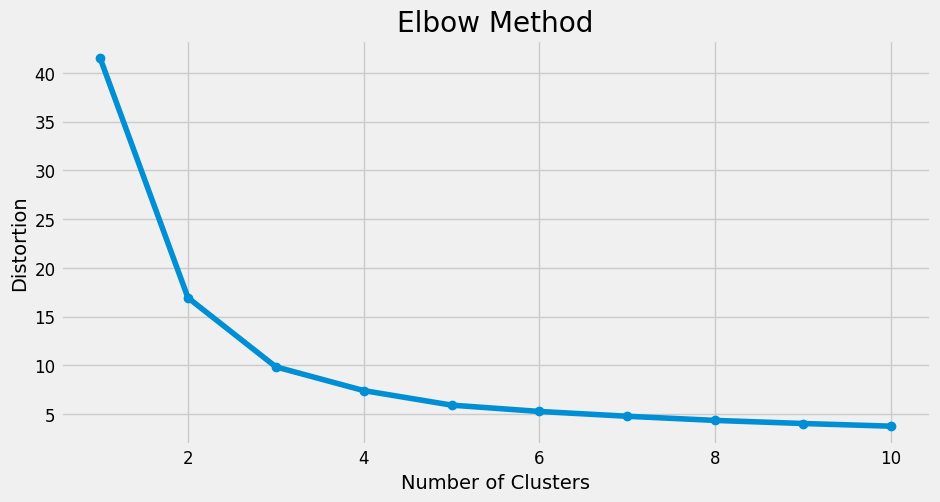

In [70]:
# Create function for determining number of optimum cluster k
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def find_optimal_k_elbow(data, max_k):
    distortions = []

    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)

    plt.figure(figsize=(10, 5))
    plt.plot(range(1, max_k + 1), distortions, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Distortion')
    plt.title('Elbow Method')
    plt.style.use('ggplot')
    plt.show()

# Determining number of optimum cluster
data = df_cln
max_k = 10
find_optimal_k_elbow(data, max_k)


To determine the optimal number of cluster, we have to select the value of k at the elbow, ie th epoint after which distortion/inertia starts decreasing in a linear fashion. Thus for the given data, we can conclude that the optimal number of clusters is 3.

##### Silhouette Score

For n_clusters = 2 The average silhouette_score is : 0.47799278063550654
For n_clusters = 3 The average silhouette_score is : 0.4294669050463297
For n_clusters = 4 The average silhouette_score is : 0.38109175331136835


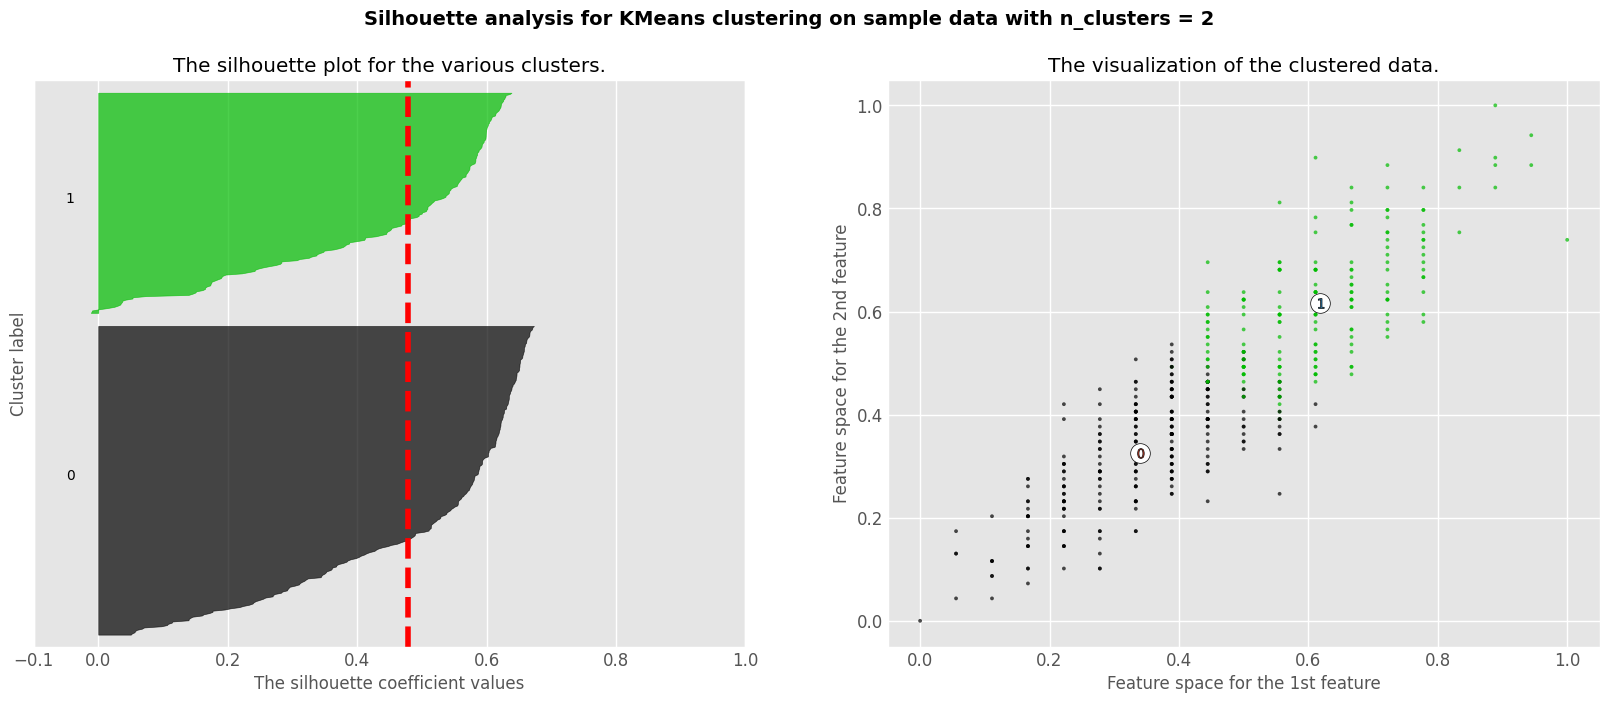

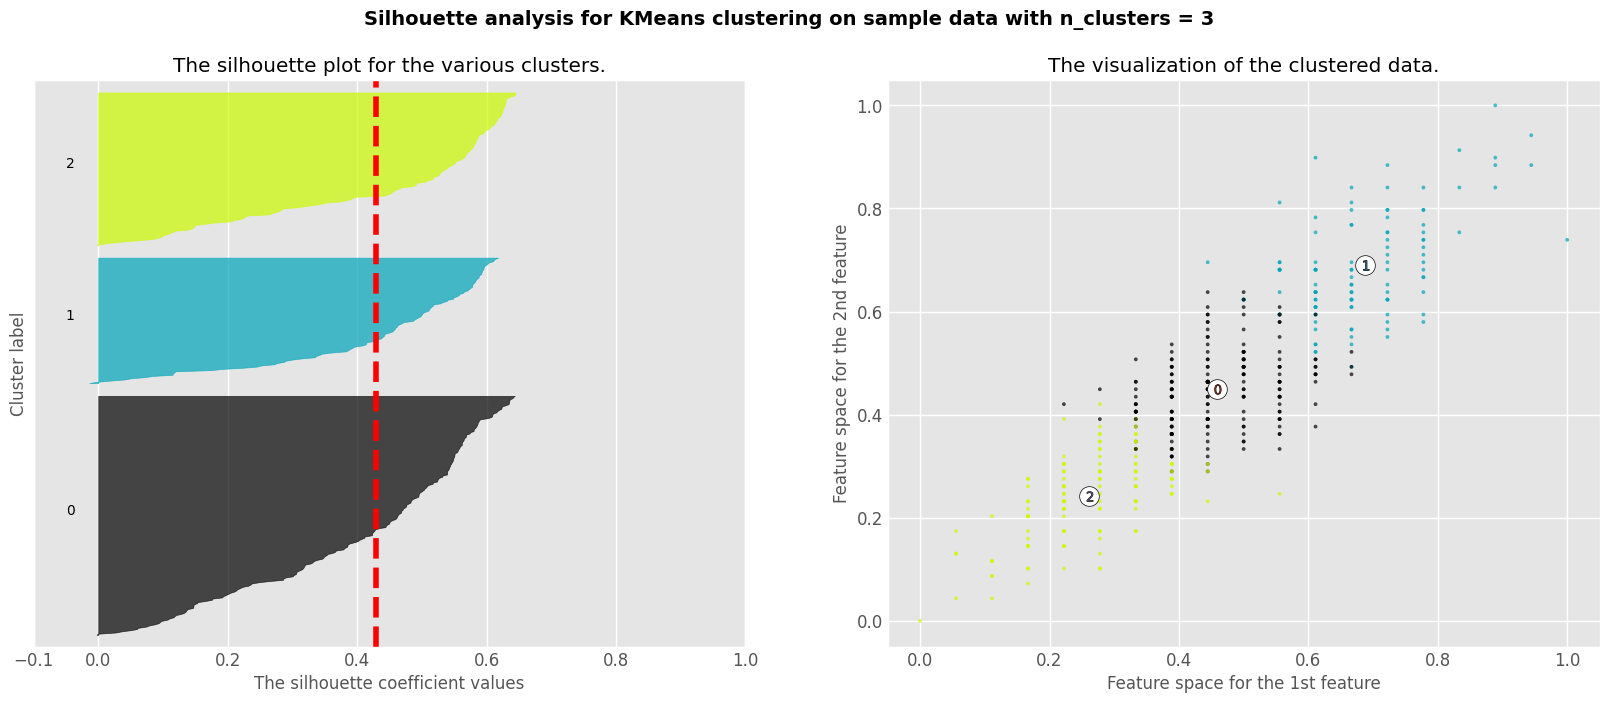

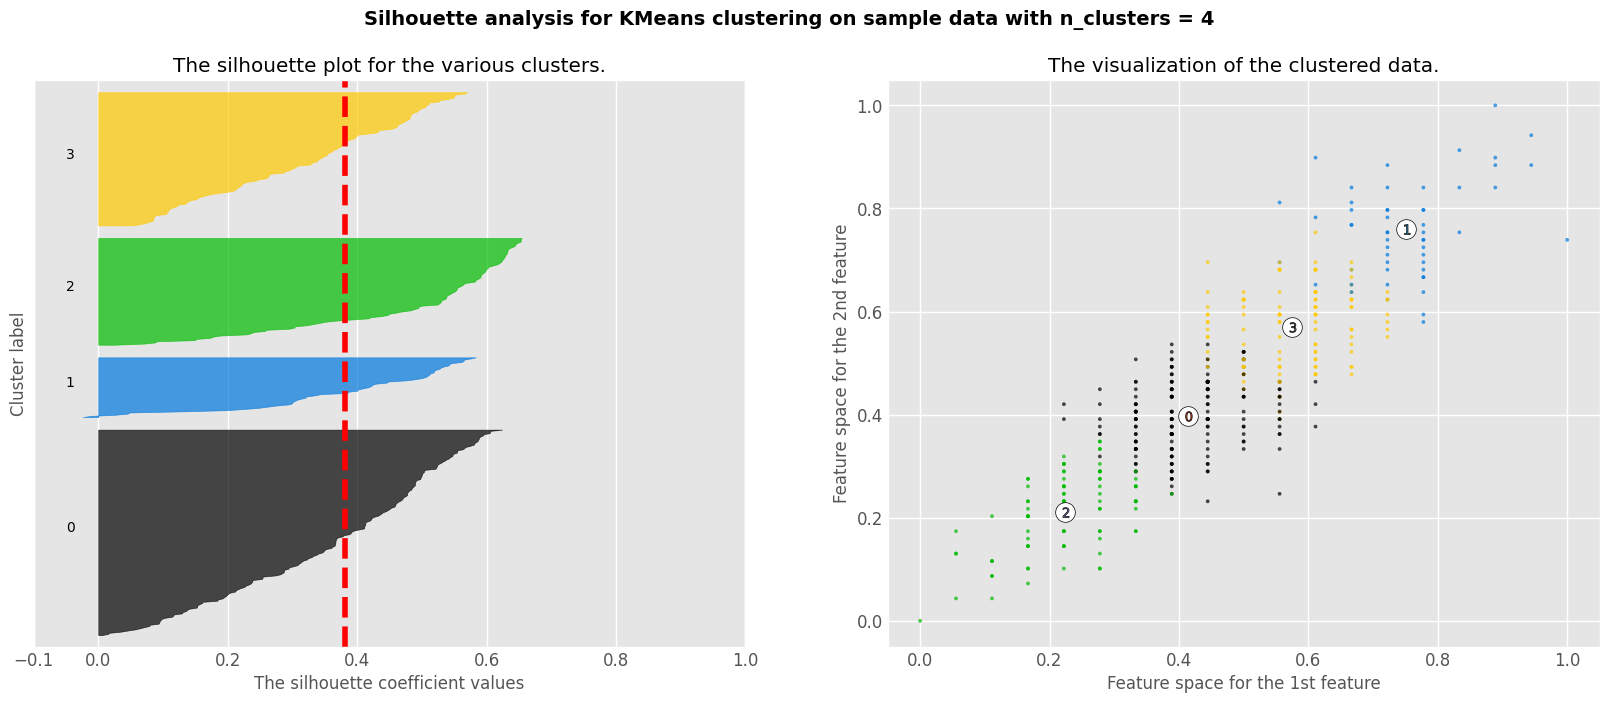

In [71]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X = cln
# For reproducibility

range_n_clusters = [2, 3, 4]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters,init='k-means++',max_iter=300, random_state=142)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

From silhouette plot we have to select the bigger value of the coefficient average and also consider proportional distribution of the clusters formed. Thus for the given data, we can conclude that the optimal number of clusters is 3.

#### K-Means Clustering

In [72]:
# Model fitting
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=30)
kmeans.fit(df_cln)

KMeans(n_clusters=3, n_init=10, random_state=30)

In [73]:
# Appending cluster label to initial cluster dataframe
df_cl['cluster'] = kmeans.labels_

In [74]:
# Displaying initial dataframe with appended cluster
df_cl.sample()

,TransactionID,Qty,TotalAmount,cluster
310,11,42,302900,0


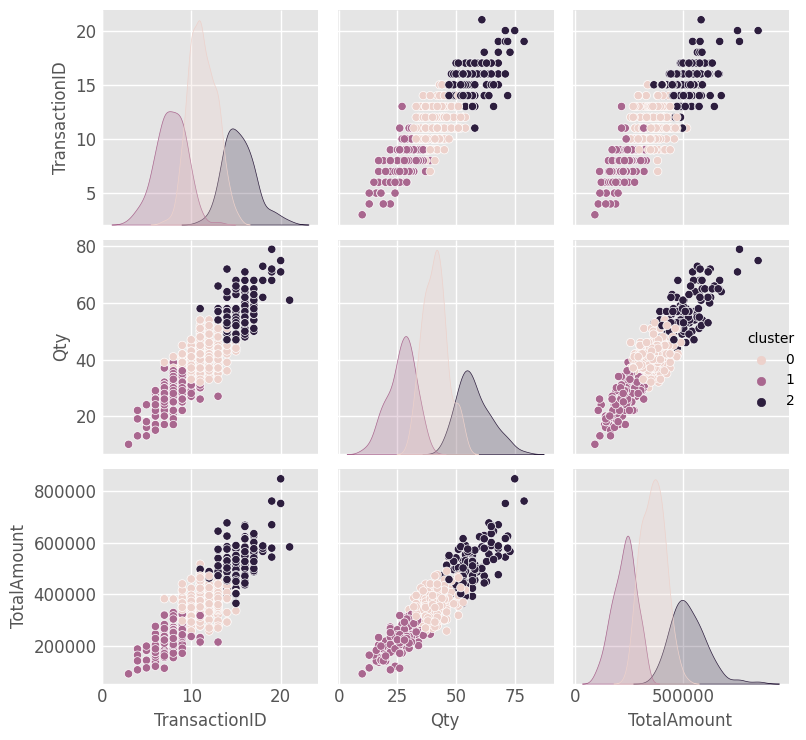

In [75]:
# Visualizing cluster
sns.pairplot(data=df_cl, diag_kind='kde', hue='cluster')
plt.tight_layout()

Above is a pairplot of each cluster’s parameters. This shows different average characteristics of 3 clusters formed by the model.


In [76]:
# Grouping data by cluster
df_clf = df_cl.groupby(['cluster']).agg({ 'TransactionID' : 'mean',
                                       'Qty' : 'mean',
                                       'TotalAmount' : 'mean'
                                }).T
df_clf

cluster,0,1,2
TransactionID,11.253659,7.702290,15.370370
Qty,41.004878,26.725191,57.574074
TotalAmount,360908.292683,228550.381679,524466.666667


#### Business Recommendation


From clusters formed above, marketing team could carry out personalized marketing strategies based on the characteristics of each customer segment as follows:

1.   Cluster 1: *Regular Customer*

  Encourage customers to spend more by promoting bundles of related products they've purchased before.
  
  Recommend products based on their past buying behavior to spark interest in new categories.

2.   Cluster 0: *Mid-Level Customer*
  
  Develop loyalty programs that reward frequent transactions, encouraging to continue purchasing regularly.

  Personalized recommendations to new products or upsell complementary items.

3. Cluster 2: *High-Level Customer*

  Create exclusive programs, offering unique benefits and access to limited-edition products.

  Offer early access to new product launches or exclusive events to strengthen their loyalty.



